In [26]:
import pandas as pd

# Wczytanie danych
df = pd.read_csv('Housing.csv')

# Podstawowe informacje o danych
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None
              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mea

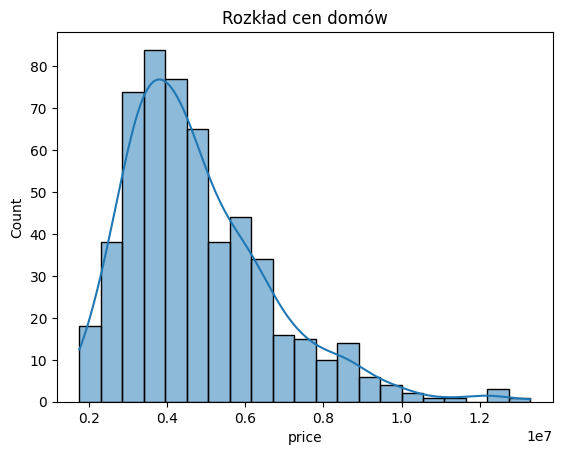

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram rozkładu cen
sns.histplot(df['price'], kde=True)
plt.title('Rozkład cen domów')
plt.show()

In [28]:
from sklearn.ensemble import IsolationForest

# Dopasowanie modelu Isolation Forest
isolation_forest = IsolationForest(contamination=0.05)
df['outliers'] = isolation_forest.fit_predict(df[['price', 'area']])
# Wyświetlenie wartości odstających
print(df[df['outliers'] == -1])

        price   area  bedrooms  bathrooms  stories mainroad guestroom  \
0    13300000   7420         4          2        3      yes        no   
1    12250000   8960         4          4        4      yes        no   
2    12250000   9960         3          2        2      yes        no   
3    12215000   7500         4          2        2      yes        no   
4    11410000   7420         4          1        2      yes       yes   
5    10850000   7500         3          3        1      yes        no   
6    10150000   8580         4          3        4      yes        no   
7    10150000  16200         5          3        2      yes        no   
8     9870000   8100         4          1        2      yes       yes   
9     9800000   5750         3          2        4      yes       yes   
10    9800000  13200         3          1        2      yes        no   
13    9240000   3500         4          2        2      yes        no   
20    8750000   4320         3          1        2 

In [29]:
import plotly.express as px

fig = px.scatter(df, y='outliers', x='price', color='outliers', title='Wartości odstające w danych')
fig.show()

In [30]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Skalowanie danych
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['area', 'price', 'bedrooms']])

# PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

# Wynik PCA
df['PC1'] = principal_components[:, 0]
df['PC2'] = principal_components[:, 1]
print(pca.explained_variance_ratio_)

[0.57528546 0.28653528]


In [31]:
fig = px.scatter(df, x='PC1', y='PC2', color='price', title='Wizualizacja glownych skladowych')

fig.show()

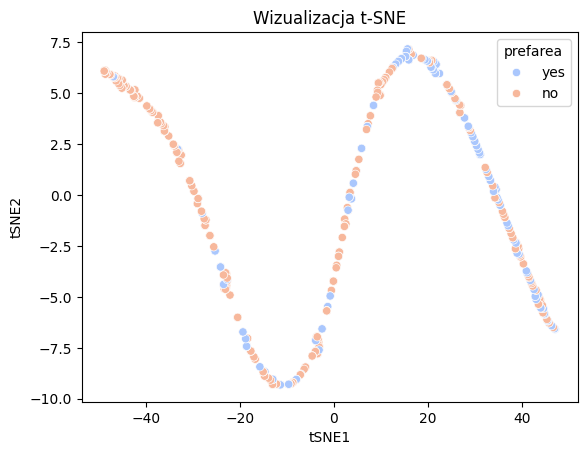

In [32]:
from sklearn.manifold import TSNE

# t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(df[['price','area',
                                       'bedrooms','bathrooms','stories','parking']])

# Dodanie wyników do ramki danych
df['tSNE1'] = tsne_results[:, 0]
df['tSNE2'] = tsne_results[:, 1]

# Wizualizacja
sns.scatterplot(data=df, x='tSNE1', y='tSNE2', hue='prefarea', palette='coolwarm')
plt.title('Wizualizacja t-SNE')
plt.show()

c:\Users\Szymon\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



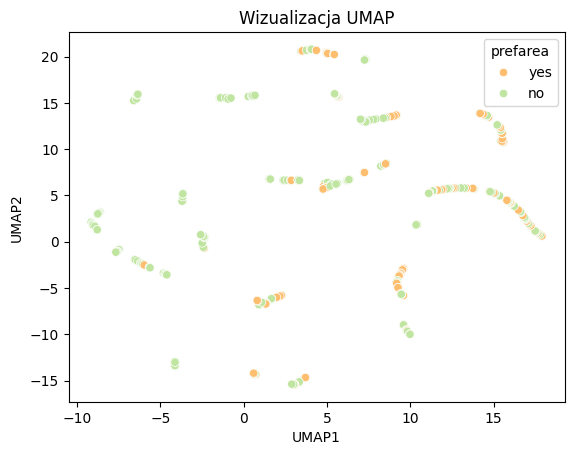

In [33]:
import umap

# UMAP
reducer = umap.UMAP(n_neighbors=10, min_dist=0.1, random_state=42)
umap_results = reducer.fit_transform(df[['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']])

# Dodanie wyników do ramki danych
df['UMAP1'] = umap_results[:, 0]
df['UMAP2'] = umap_results[:, 1]
# wizualizacja
sns.scatterplot(data=df, x='UMAP1', y='UMAP2', hue='prefarea', palette='Spectral')
plt.title('Wizualizacja UMAP')
plt.show()

In [34]:
import altair as alt

chart = alt.Chart(df).mark_circle(size=60).encode(
    x='area',
    y='price',
    color='bedrooms',
    tooltip=['area', 'price', 'bedrooms']
).interactive()

chart.show()

alt.Chart(...)

In [38]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# Model ANOVA
model = ols('price ~ C(bedrooms)', data=df).fit()
anova_results = anova_lm(model)

print(anova_results)

                df        sum_sq       mean_sq          F        PR(>F)
C(bedrooms)    5.0  2.933324e+14  5.866649e+13  19.642037  5.359906e-18
Residual     539.0  1.609876e+15  2.986782e+12        NaN           NaN
